### Introduction

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

We will be taking a small forecasting problem and try to solve it with time series using ARIMA models

### What is Time Series Analysis
Time series analysis is a statistical technique that deals with time series data, or trend analysis.  Time series data means that data is in a series of  particular time periods or intervals

**Terms and concepts:**
- **Dependence**: Dependence refers to the association of two observations with the same variable, at prior time points.
- **Stationarity**: Shows the mean value of the series that remains constant over a time period; if past effects accumulate and the values increase toward infinity, then stationarity is not met.
- **Differencing**: Used to make the series stationary, to De-trend, and to control the auto-correlations; however, some time series analyses do not require differencing and over-differenced series can produce inaccurate estimates.
- **Specification**: May involve the testing of the linear or non-linear relationships of dependent variables by using models such as ARIMA, ARCH, GARCH, VAR, Co-integration, etc.

**Exponential smoothing in time series analysis:** This method predicts the one next period value based on the past and current value.  It involves averaging of data such that the nonsystematic components of each individual case or observation cancel out each other.  The exponential smoothing method is used to predict the short term predication.  Alpha, Gamma, Phi, and Delta are the parameters that estimate the effect of the time series data.  Alpha is used when seasonality is not present in data.  Gamma is used when a series has a trend in data.  Delta is used when seasonality cycles are present in data.  A model is applied according to the pattern of the data.  
**Curve fitting in time series analysis:** Curve fitting regression is used when data is in a non-linear relationship. The following equation shows the non-linear behavior:
Dependent variable, where case is the sequential case number.
Curve fitting can be performed by selecting “regression” from the analysis menu and then selecting “curve estimation” from the regression option. Then select “wanted curve linear,” “power,” “quadratic,” “cubic,” “inverse,” “logistic,” “exponential,” or “other.”<br>
**ARIMA:**<br>
ARIMA stands for autoregressive integrated moving average.  This method is also known as the Box-Jenkins method.<br>
**Identification of ARIMA parameters:**<br>
**Autoregressive component:** AR stands for autoregressive.  Autoregressive paratmeter is denoted by p.  When p =0, it means that there is no auto-correlation in the series.  When p=1, it means that the series auto-correlation is till one lag.<br>
**Integrated:** In ARIMA time series analysis, integrated is denoted by d.  Integration is the inverse of differencing.  When d=0, it means the series is stationary and we do not need to take the difference of it.  When d=1, it means that the series is not stationary and to make it stationary, we need to take the first difference.  When d=2, it means that the series has been differenced twice.  Usually, more than two time difference is not reliable.<br>
**Moving average component:** MA stands for moving the average, which is denoted by q.  In ARIMA, moving average q=1 means that it is an error term and there is auto-correlation with one lag.<br>
In order to test whether or not the series and their error term is auto correlated, we usually use W-D test, ACF, and PACF.<br>
**Decomposition:** Refers to separating a time series into trend, seasonal effects, and remaining variabilityAssumptions:<br>
**Stationarity:** The first assumption is that the series are stationary.  Essentially, this means that the series are normally distributed and the mean and variance are constant over a long time period.<br>
**Uncorrelated random error:** We assume that the error term is randomly distributed and the mean and variance are constant over a time period.  The Durbin-Watson test is the standard test for correlated errors.<br>
**No outliers:** We assume that there is no outlier in the series.  Outliers may affect conclusions strongly and can be misleading.<br>
**Random shocks (a random error component):** If shocks are present, they are assumed to be randomly distributed with a mean of 0 and a constant variance.

In [47]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

from chart_studio.plotly import plot_mpl


### Problem Statement
The dataset contains only 2 columns, one column is Date and other column relates to the consumption for the next 6 years i.e. till 2024

### Load the dataset

In [2]:
df_elect = pd.read_csv('/Users/anshularya/Downloads/Electric_Production.csv')

In [3]:
df_elect.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


To perform time series analysis, we need to convert the Date to proper date time format and make Date as an Index as without it, it is not possible to plot the graph

In [4]:
df_elect.columns = ['Date', 'Consumption']
df_elect = df_elect.dropna()
df_elect['Date'] = pd.to_datetime(df_elect['Date'])
df_elect.set_index('Date', inplace=True)

In [5]:
df_elect.head()

,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


### 1. Visualize the time series

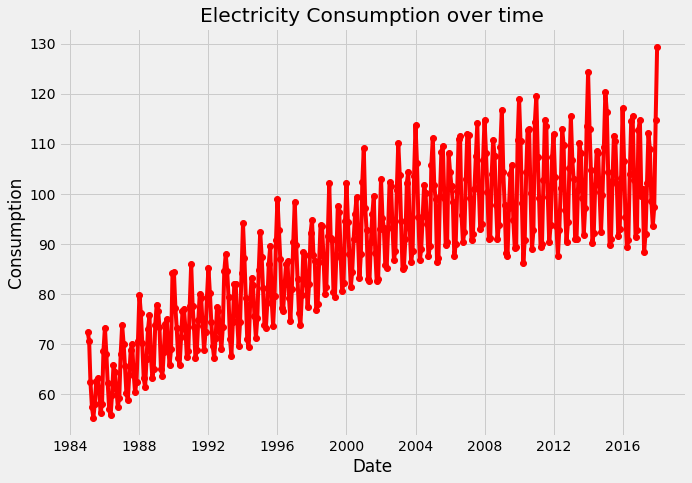

In [11]:
plt.xlabel('Date')
plt.ylabel("Consumption")
plt.title("Electricity Consumption over time")
plt.plot(df_elect, color = "red", marker = 'o')

For time series forecasting, a series needs to be stationary. The series should have a constant mean, variance and standard deviation.<br>
In our plot, the mean is not constant and we can clearly see an upward trend. 

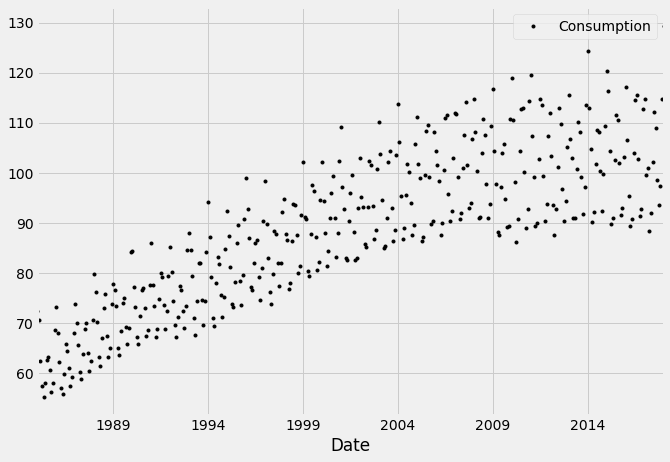

In [15]:
df_elect.plot(style = 'k.')
plt.show()

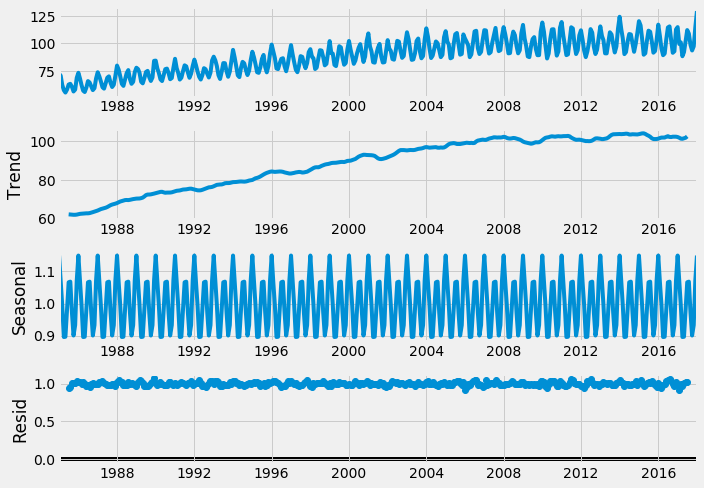

In [16]:
s_dec = seasonal_decompose(df_elect, model='multiplicative')
s_dec.plot()
plt.show()

### 2. Stationarising the time Series

First, we need to check if a series is stationary or not.
**ADF(Augmented Dickey-Fuller) Test**
The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:<br>
- **Null Hypothesis:** The series has a unit root (value of a =1)
- **Alternate Hypothesis:** The series has no unit root.<br>

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).
If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.


In [32]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.plot(timeseries, color='orange', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
    # Perform dickey fuller test
    print("Result of Dickey Fuller Test")
    adft = adfuller(timeseries['Consumption'], autolag='AIC')
    output = pd.Series(adft[0:4], index=[
                       'Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key, value in adft[4].items():
        output['critical value (%s)'%key] = value
    print(output)

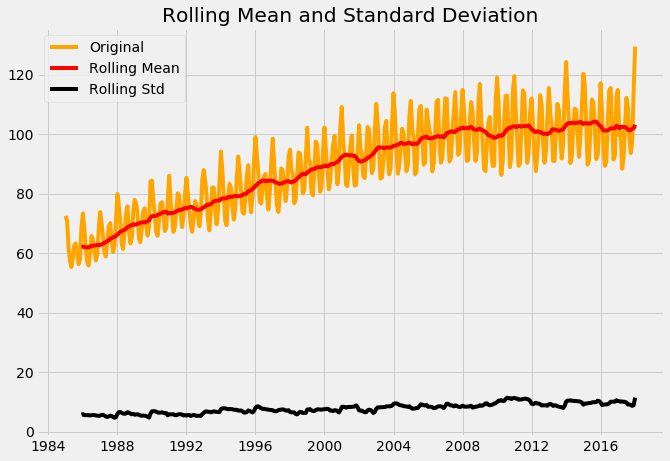

Result of Dickey Fuller Test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [33]:
test_stationarity(df_elect)

We see that the **p-value** is greater than 0.05 so we cannot reject the **Null hypothesis**. Also, the test statistics is greater than the critical values. so the data is non-stationary.<br>
To get a stationary series, we need to eliminate the trend and seasonality from the series.<br>
we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.


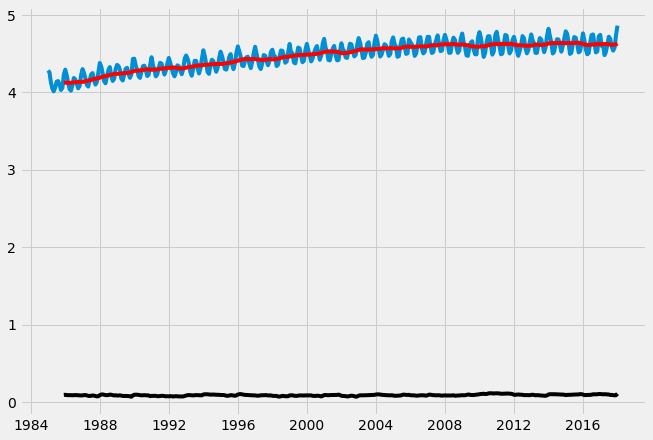

In [34]:
df_log = np.log(df_elect)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color = 'red')
plt.plot(std_dev, color = 'black')
plt.show()

In [28]:
df_log_moving_avg_diff = df_log - moving_avg
df_log_moving_avg_diff.dropna(inplace = True)

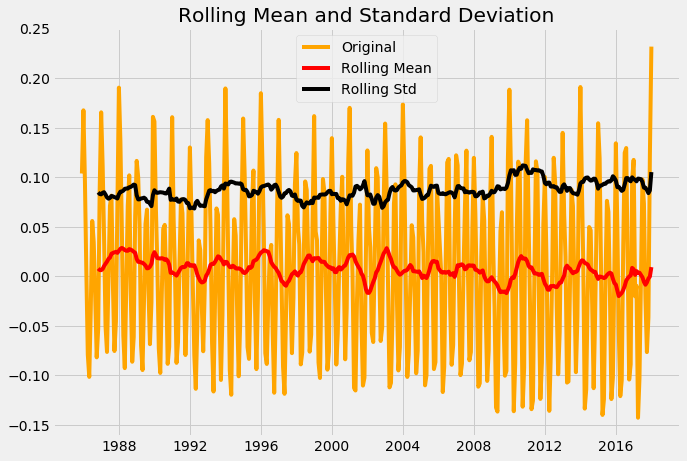

Result of Dickey Fuller Test
Test Statistics                 -5.211586
p-value                          0.000008
No. of lags used                15.000000
Number of observations used    370.000000
critical value (1%)             -3.448148
critical value (5%)             -2.869383
critical value (10%)            -2.570948
dtype: float64


In [35]:
test_stationarity(df_log_moving_avg_diff)

In [36]:
weighted_average = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()

In [37]:
logScale_weightedMean = df_log - weighted_average

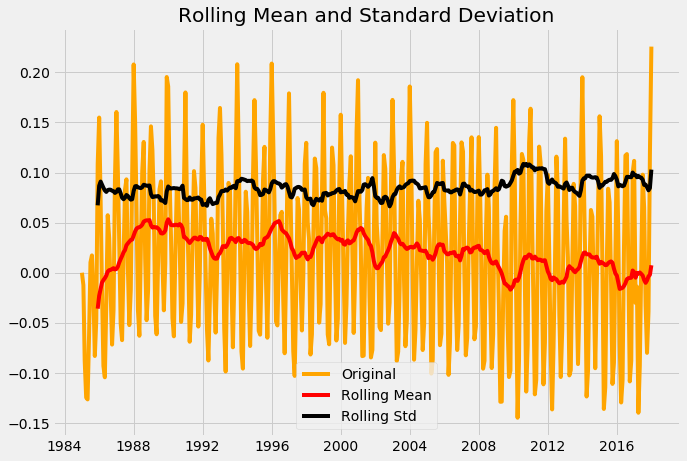

Result of Dickey Fuller Test
Test Statistics                 -3.251531
p-value                          0.017189
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [38]:
test_stationarity(logScale_weightedMean)

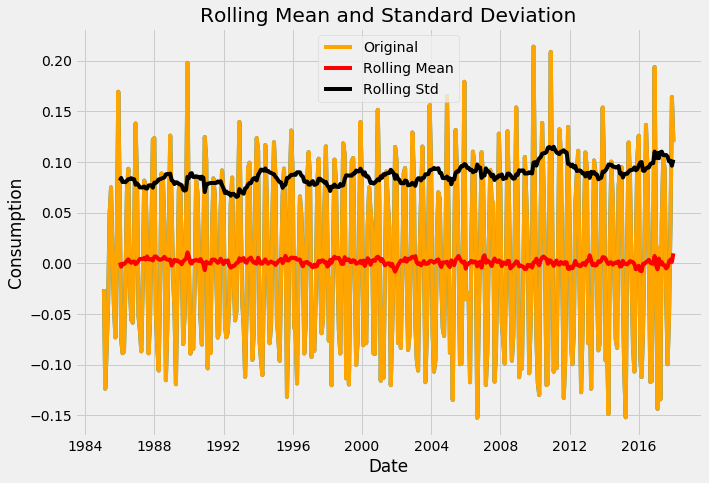

Result of Dickey Fuller Test
Test Statistics               -6.748333e+00
p-value                        2.995161e-09
No. of lags used               1.400000e+01
Number of observations used    3.810000e+02
critical value (1%)           -3.447631e+00
critical value (5%)           -2.869156e+00
critical value (10%)          -2.570827e+00
dtype: float64


In [40]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(df_log_diff)

df_log_diff.dropna(inplace = True)
test_stationarity(df_log_diff)

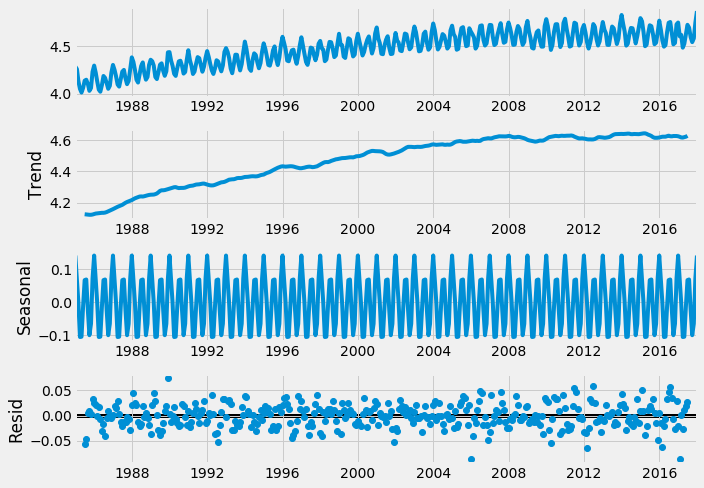

In [42]:
result = seasonal_decompose(df_log, model='additive', freq = 12)
result.plot()
plt.show()

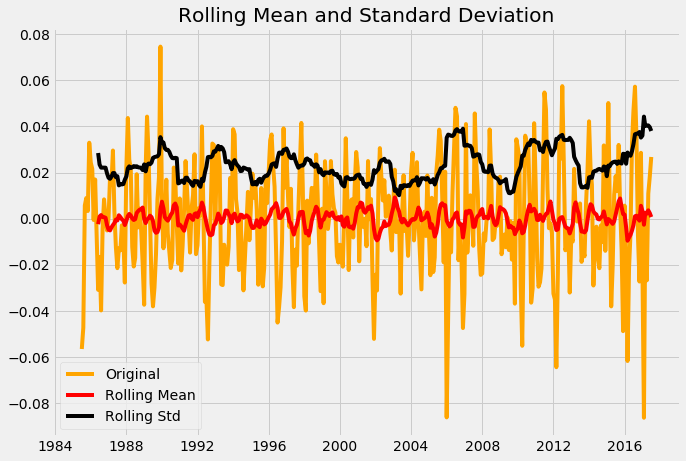

Result of Dickey Fuller Test


KeyError: 'Consumption'

In [43]:
trend = result.trend
trend.dropna(inplace = True)

seasonality = result.seasonal
seasonality.dropna(inplace = True)

residual = result.resid
residual.dropna(inplace=True)

test_stationarity(residual)

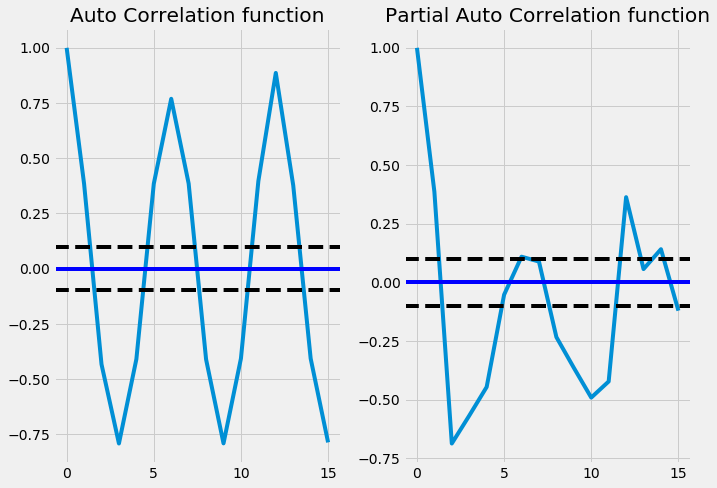

In [46]:
acf = acf(df_log_diff, nlags = 15)
pacf = pacf(df_log_diff, nlags = 15, method = 'ols')

# Plot PACF
plt.subplot(121)
plt.plot(acf)
plt.axhline(y=0, linestyle = '-', color = 'blue')
plt.axhline(y = -1.96 / np.sqrt(len(df_log_diff)), linestyle = '--', color = 'black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)), linestyle = '--', color = 'black')
plt.title('Auto Correlation function')
plt.tight_layout()

# Plot ACF
plt.subplot(122)
plt.plot(pacf)
plt.axhline(y=0, linestyle = '-', color = 'blue')
plt.axhline(y = -1.96 / np.sqrt(len(df_log_diff)), linestyle = '--', color = 'black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)), linestyle = '--', color = 'black')
plt.title('Partial Auto Correlation function')
plt.tight_layout()

### 4. Fitting Model


RSS : 0.522728


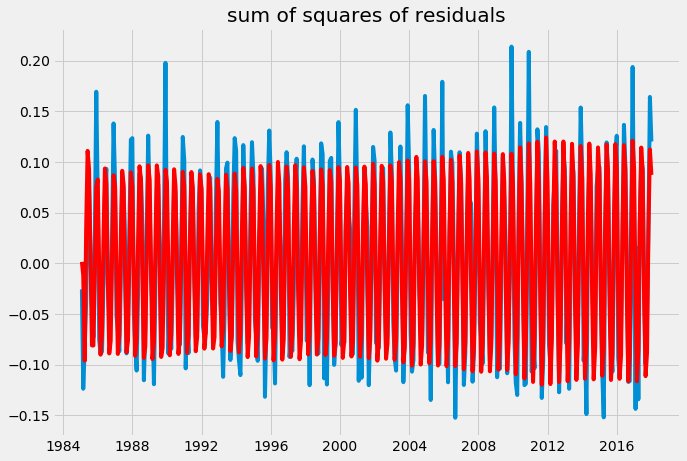

In [53]:
model = ARIMA(df_log, order=(3,1,3))
result_AR = model.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color = 'red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["Consumption"])**2))

### 5. Predictions

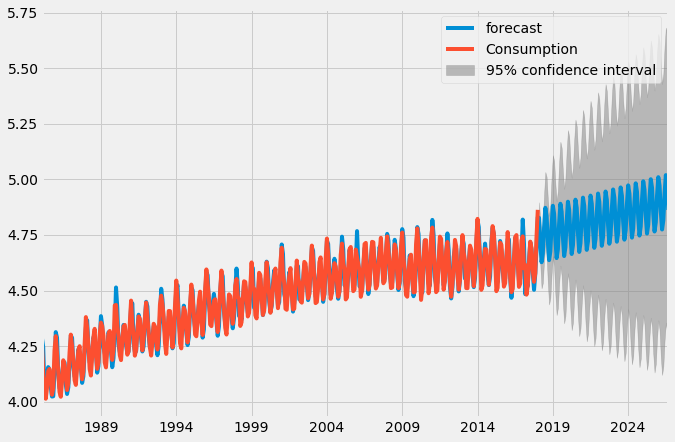

In [54]:
result_AR.plot_predict(1,500)
x = result_AR.forecast(steps=200)